<a href="https://colab.research.google.com/github/MazonSzymon/Project_COVID_portfolio/blob/main/project_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#  ***Analysis of investing at GPW in 2020*** 

---













#Downloading libraries and creating wig20 table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader as pdr 
%load_ext google.colab.data_table

In [27]:
IPython_default = plt.rcParams.copy()

In [132]:
from cycler import cycler
plt.style.use('ggplot')
plt.rc('axes', facecolor='white', edgecolor='black', grid = False, axisbelow = True)
# draw solid white grid lines
plt.rc('grid',color='gray', linestyle='solid', linewidth=0.5)
plt.rc('patch', edgecolor='black')
plt.rc('legend', shadow=True, handlelength=1, fontsize=10, edgecolor = 'black', facecolor='white')


In [2]:
stocks_at_WIG20 = pd.DataFrame(np.array([
    ['WIG20' , 'wig20.pl'],
    ['Alior Bank' , 'alr.pl'],
    ['CCC' , 'ccc.pl'],
    ['CD projekt' , 'cdr.pl'],
    ['Cyfrowy Polsat SA' , 'cps.pl'],
    ['Dino Polska' , 'dnp.pl'],
    ['Jastrzebska Spolka Weglowa' , 'jsw.pl'],
    ['KGHM Polska Mied' , 'kgh.pl'],
    ['LPP' , 'lpp.pl'],
    ['Grupa Lotos SA' , 'lts.pl'],
    ['mBank' , 'mbk.pl'],
    ['Orange Polska' , 'opl.pl'],
    ['Bank Polka Kasa Opieki' , 'peo.pl'],
    ['PGE Polska Grupa Energetyczna' , 'pge.pl'],
    ['Polskie Gronictwo Naftowe i Gazownictwo' , 'pgn.pl'],
    ['Powszechna Kasa Oszczednosci Bank Polski' , 'pko.pl'],
    ['Play Communications SA' , 'ply.pl'],
    ['Powszechny Zaklad Ubezpieczen' , 'pzu.pl'],
    ['Santander Bank Polska' , 'spl.pl'],
    ['Tauron Polska Energia' , 'tpe.pl']
    ]), columns = ['Full_name','Short_name'])

# Functions

> ## For portfolios with one joint stock company

>> ### Downloading data

In [3]:
def get_data(stock,start_date, end_date):
  df = pdr.get_data_stooq(stock['Short_name'], start = start_date, end = end_date).sort_index()
  return df

>> ### Basic informaction about data set

In [4]:
def basic_summary_data(data):

  print("-"*50)
  print('5 first and 5 last record'+ "\n")
  print(df.head())
  print("-"*50)
  print(df.tail())
  print("-"*50+"\n")
  
  print('Summary of dataframe' + "\n")
  print(df.info())
  print("-"*50+"\n")
  
  print('Statistical summary' + "\n")
  print(df.describe())
  print("-"*50)

  return 

>>### Change interval

In [5]:
def change_interval(data):
  
  print("-"*50)
  print("Week's mean" + "\n")
  print(df.resample('W').mean().tail())
  
  print("-"*50+"\n")
  print("Month's last value" + "\n")
  print(df.resample('M').last().tail())
  print("-"*50)
  return 

>>### Visualization of stock actions

In [6]:
def make_graphics(data):
  plt.figure( figsize = (28, 8 ))
  #1
  plt.subplot(121)
  plt.plot(df['Close'], color = 'blue')
  plt.title('Stocks Value')
  plt.grid()
  #2
  plt.subplot(122)
  plt.plot(df['Volume'], color = 'red')
  plt.title('Volume')
  plt.grid()
  return plt.show()

>>### Relative change

In [7]:
def relative_change(data):
  # Creating new columns with percentage change between the current and a prior element
  data['pct_change'] = data['Close'].pct_change()
  data['log_change'] = np.log(data['Close'].pct_change() + 1)

  # Graphs
  plt.figure(figsize=(28,8))
  #1
  plt.subplot(121)
  plt.plot(data['log_change'])
  #2
  plt.subplot(122)
  plt.hist(data['log_change'], bins = 50)
  
  return plt.show()

>>### Making portfolio

In [272]:
def preparing_portfolio(total_investment, stock, start_date, end_date):
  

  #Downloading data
  portfolio = get_data(stock,start_date,end_date)

  #Our portfolio
  portfolio_change = (1 + portfolio['Close'].pct_change()).cumprod().fillna(1)
  portfolio_value = portfolio_change.multiply(total_investment).round(2).rename(columns = {stock['Short_name'].values[0] : 'Value_of_investment'})


  return   portfolio_value

In [170]:
def portfolio_summary(total_investment, stock, start_date, end_date):
  

  #Downloading data
  benchmark_stock = stocks_at_WIG20[stocks_at_WIG20['Full_name'] == 'WIG20']
  benchmark = get_data(benchmark_stock,start_date,end_date)
  portfolio = get_data(stock,start_date,end_date)
  
  #Benchmark
  benchmark_change = (1 + benchmark['Close'].pct_change()).cumprod().fillna(1)
  benchmark_value = benchmark_change.multiply(total_investment).round(2).rename(columns = {benchmark_stock['Short_name'].values[0] : 'Value_of_investment'})

  #Our portfolio
  portfolio_change = (1 + portfolio['Close'].pct_change()).cumprod().fillna(1)
  portfolio_value = portfolio_change.multiply(total_investment).round(2).rename(columns = {stock['Short_name'].values[0] : 'Value_of_investment'})

  #Compare
  print("-"*50)
  print("Our investment {initial_investment_value} PLN at {full_name} on {end_date} is worth {investment_value} PLN".format(
     initial_investment_value = portfolio_value['Value_of_investment'][0],full_name = stock['Full_name'].values[0], end_date = end_date, investment_value = portfolio_value['Value_of_investment'][-1]))
  
  print("Percentage change between the current and a initial value of investment is {change}%".format(
      change = ((portfolio_value['Value_of_investment'][-1]/portfolio_value['Value_of_investment'][0] -1)*100).round(2)))
  
  print("Ratio investment to benchmark is {change}%".format(
      change = ((portfolio_value['Value_of_investment'][-1]/benchmark_value['Value_of_investment'][-1] - 1)*100).round(2)))
  print("-"*50+ "\n")
  
  #Graphs
  plt.figure(figsize=(15,10))
  plt.plot(portfolio_value, color = 'blue', label = 'Value of investment ' + stock['Full_name'].values[0])
  plt.plot(benchmark_value, color = 'green', label = 'Value of investment Benchmark')
  plt.grid()
  plt.legend()

  return   portfolio_value

# WIG20

In [ ]:
portfolio_WIG20 = pd.DataFrame()
portfolio_WIG20['Date'] = pd.date_range(start= start_date, end = end_date)
portfolio_WIG20.set_index('Date', inplace = True)
portfolio_WIG20.sort_index(inplace = True)
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
total_investment = 1000

for i in range(len(stocks_at_WIG20)):
  
  name = stocks_at_WIG20['Full_name'][i]
  query = stocks_at_WIG20['Full_name'] == name
  stock = stocks_at_WIG20[query]
  

  portfolio_stock = preparing_portfolio(total_investment,stock,start_date,end_date)
  portfolio_WIG20[name] = portfolio_stock['Value_of_investment'] 


In [274]:
preparing_portfolio(total_investment,stock,start_date,end_date)

KeyError: ignored

In [246]:
portfolio_WIG20 = pd.DataFrame()

start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
total_investment = 1000

for i in range(len(stocks_at_WIG20)):
  
  name = stocks_at_WIG20['Full_name'][i]
  query = stocks_at_WIG20['Full_name'] == name
  stock = stocks_at_WIG20[query]
  
  portfolio_stock = preparing_portfolio(total_investment,stock,start_date,end_date)
  portfolio_stock['Name'] = name
  portfolio_stock['pct_change'] = np.log(portfolio_stock['Value_of_investment'].pct_change() + 1).fillna(1)
  portfolio_WIG20 = portfolio_WIG20.append(portfolio_stock)

Symbols
Value_of_investment    1876.83
pct_change                1.00
dtype: float64

In [236]:
tmp = df
tmp['Name'] = name
tmp.append(df)

Attributes,Close,High,Low,Open,Volume,pct_change,log_change,Name
Symbols,dnp.pl,dnp.pl,dnp.pl,dnp.pl,dnp.pl,,,
Date,,,,,,,,
2020-01-02,145.2,145.2,142.0,144.3,161952,NaN,NaN,WIG20
2020-01-03,141.8,144.7,141.8,144.7,159715,-0.023416,-0.023694,WIG20
2020-01-07,143.3,145.4,140.1,141.7,164973,0.010578,0.010523,WIG20
2020-01-08,142.3,142.9,141.8,142.5,51186,-0.006978,-0.007003,WIG20
2020-01-09,145.2,145.3,142.7,142.7,105254,0.020379,0.020175,WIG20
...,...,...,...,...,...,...,...,...
2020-10-08,217.4,224.0,217.4,222.2,163329,-0.021602,-0.021839,WIG20
2020-10-09,215.2,219.8,209.4,216.2,260019,-0.010120,-0.010171,WIG20


In [192]:
portfolio_WIG20

,WIG20,Alior Bank,CCC,CD projekt,Cyfrowy Polsat SA,Dino Polska,Jastrzebska Spolka Weglowa,KGHM Polska Mied,LPP,Grupa Lotos SA,mBank,Orange Polska,Bank Polka Kasa Opieki,PGE Polska Grupa Energetyczna,Polskie Gronictwo Naftowe i Gazownictwo,Powszechna Kasa Oszczednosci Bank Polski,Play Communications SA,Powszechny Zaklad Ubezpieczen,Santander Bank Polska,Tauron Polska Energia
Date,,,,,,,,,,,,,,,,,,,,
2020-01-01,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
2020-01-02,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
2020-01-03,988.12,973.24,983.61,997.21,992.94,976.58,960.40,981.82,997.74,985.58,1005.07,982.71,998.04,985.97,1000.00,979.70,966.36,990.31,987.76,983.58
2020-01-04,974.96,953.85,978.43,989.54,980.99,986.91,999.17,980.18,988.13,953.30,993.91,981.33,985.78,959.35,987.07,970.68,960.67,980.87,974.87,982.40
2020-01-05,974.96,953.85,978.43,989.54,980.99,986.91,999.17,980.18,988.13,953.30,993.91,981.33,985.78,959.35,987.07,970.68,960.67,980.87,974.87,982.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-11,765.06,482.11,392.67,1293.58,959.17,1494.49,1023.93,1245.15,754.66,398.20,425.96,968.19,510.39,702.64,1118.45,621.65,1158.45,595.40,475.19,1209.38
2020-10-12,765.06,482.11,392.67,1293.58,959.17,1494.49,1023.93,1245.15,754.66,398.20,425.96,968.19,510.39,702.64,1118.45,621.65,1158.45,595.40,475.19,1209.38
2020-10-13,754.57,465.89,405.52,1335.43,939.46,1477.96,990.10,1215.53,741.66,393.38,401.88,964.04,491.37,679.41,1076.47,605.86,1157.85,590.80,450.71,1152.49


In [207]:
max_investment_value = pd.DataFrame()
max_investment_value['']

<bound method DataFrame.max of               WIG20  Alior Bank  ...  Santander Bank Polska  Tauron Polska Energia
Date                             ...                                              
2020-01-01  1000.00     1000.00  ...                1000.00                1000.00
2020-01-02  1000.00     1000.00  ...                1000.00                1000.00
2020-01-03   988.12      973.24  ...                 987.76                 983.58
2020-01-04   974.96      953.85  ...                 974.87                 982.40
2020-01-05   974.96      953.85  ...                 974.87                 982.40
...             ...         ...  ...                    ...                    ...
2020-10-11   765.06      482.11  ...                 475.19                1209.38
2020-10-12   765.06      482.11  ...                 475.19                1209.38
2020-10-13   754.57      465.89  ...                 450.71                1152.49
2020-10-14   759.17      463.71  ...                 444

In [183]:
  start_date = dt.datetime(2020,1,1)
  end_date = dt.date.today()
  total_investment = 1000
  portfolio_WIG20 = pd.DataFrame()
  portfolio_WIG20['Date'] = pd.date_range(start= start_date, end = end_date)
  portfolio_WIG20.set_index('Date', inplace = True)
  portfolio_WIG20.sort_index(inplace = True)

# Alior


> ## Preparing data

In [275]:
name = 'Alior Bank'
query = stocks_at_WIG20['Full_name'] == name
stock = stocks_at_WIG20[query]
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
total_investment = 1000

In [278]:
df = get_data(stock,start_date,end_date)

In [279]:
df

Exceeded the daily hits limit


> ## Data mining

>> ### 1. Basic information about data




In [ ]:
basic_summary_data(df)

--------------------------------------------------
5 first and 5 last record

Attributes  Close   High    Low   Open  Volume
Symbols    alr.pl alr.pl alr.pl alr.pl  alr.pl
Date                                          
2020-01-02  29.90  30.12  28.68  28.84  313011
2020-01-03  29.10  30.00  29.10  29.90  258025
2020-01-07  28.52  29.50  28.50  29.40  296709
2020-01-08  27.96  28.48  27.80  28.40  348488
2020-01-09  28.26  28.64  28.10  28.40  280134
--------------------------------------------------
Attributes   Close    High     Low    Open   Volume
Symbols     alr.pl  alr.pl  alr.pl  alr.pl   alr.pl
Date                                               
2020-10-08  14.240  15.395  13.830  15.020  1170943
2020-10-09  14.190  14.250  13.745  14.240   413416
2020-10-12  14.415  14.415  13.840  14.210   326631
2020-10-13  13.930  14.350  13.760  14.325   527995
2020-10-14  13.865  14.300  13.800  13.930   385472
--------------------------------------------------

Summary of dataframe

<clas

>> ### 2. Change interval

In [ ]:
change_interval(df)

--------------------------------------------------
Week's mean

Attributes   Close    High     Low    Open    Volume
Symbols     alr.pl  alr.pl  alr.pl  alr.pl    alr.pl
Date                                                
2020-09-20  14.043  14.199  13.855  14.117  317191.0
2020-09-27  12.437  12.901  12.235  12.831  622545.6
2020-10-04  12.908  13.139  12.458  12.678  464887.6
2020-10-11  14.253  14.571  13.685  14.114  696936.0
2020-10-18  14.070  14.355  13.800  14.155  413366.0
--------------------------------------------------

Month's last value

Attributes   Close    High    Low   Open  Volume
Symbols     alr.pl  alr.pl alr.pl alr.pl  alr.pl
Date                                            
2020-06-30  16.150  16.590  16.10  16.59  532935
2020-07-31  14.585  14.960  14.30  14.54  415386
2020-08-31  13.700  14.060  13.64  13.92  273549
2020-09-30  13.420  13.435  12.20  12.41  673677
2020-10-31  13.865  14.300  13.80  13.93  385472
------------------------------------------------

>> ### 3. Visualization data

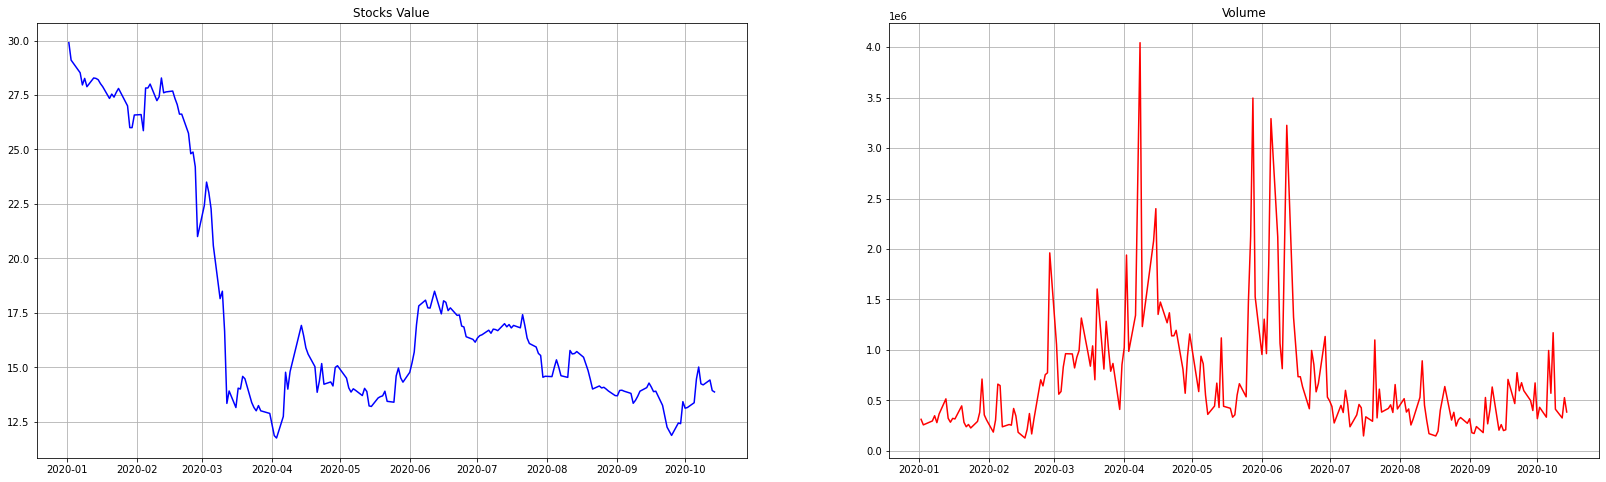

In [ ]:
make_graphics(df)

>> ### 4. Relative change

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


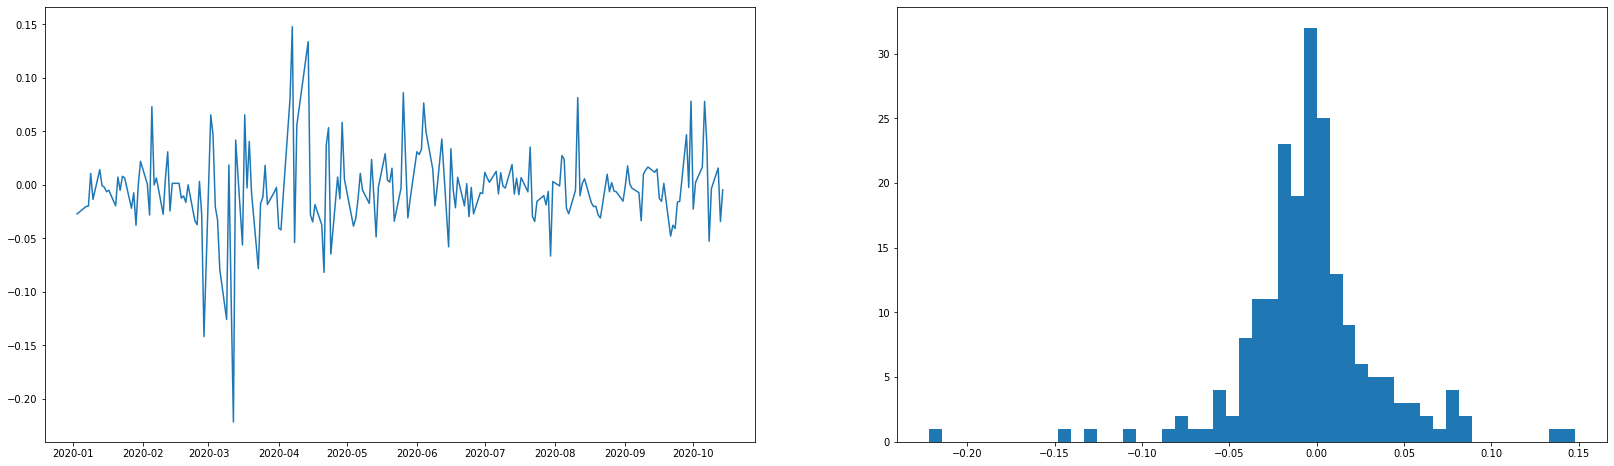

In [ ]:
relative_change(df)

> ## Analysis of our investment

--------------------------------------------------
Our investment 1000.0 PLN at Alior Bank on 2020-10-14 is worth 463.71 PLN
Percentage change between the current and a initial value of investment is -53.63%
Ratio investment to benchmark is -38.55%
--------------------------------------------------



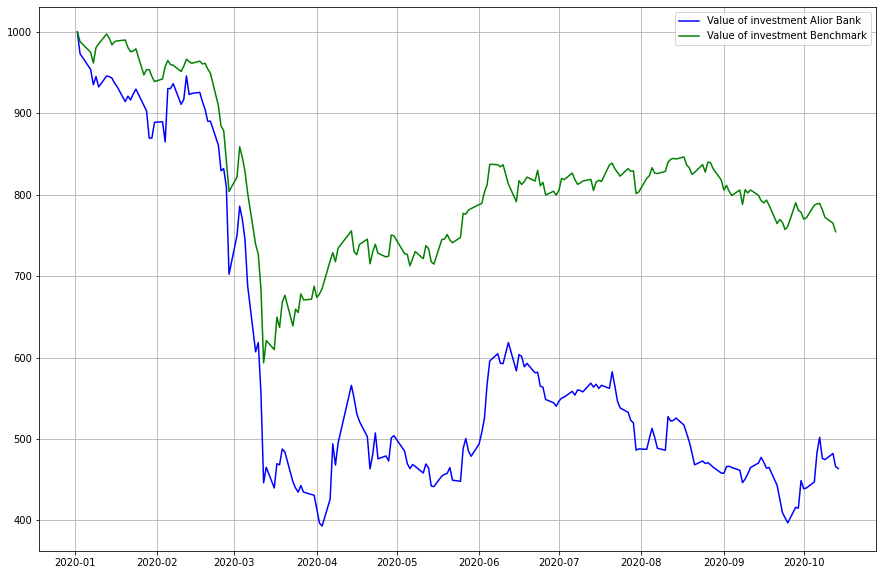

In [ ]:
portfolio_summary(total_investment,stock,start_date,end_date)

# CCC

> ## Pobieranie danych






In [ ]:
stock = 'ccc.pl'
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
total_investment = 1000

In [ ]:
df = get_data(stock,start_date,end_date)

--------------------ccc.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

             Open   High    Low  Close  Volume
Date                                          
2020-10-07  52.70  53.06  49.31  50.80  358237
2020-10-08  51.30  51.68  46.56  46.80  584907
2020-10-09  46.96  46.97  43.86  45.70  566163
2020-10-12  45.20  46.00  44.25  45.51  298505
2020-10-13  45.00  47.52  45.00  47.00  259101
--------------------------------------------------



> ## Analiza danych

>> ### 1. Podstawowe statystyki oraz wstępna eksploracja danych




In [ ]:
basic_summary_data(df)

--------------------------------------------------
Pięc pierwszych oraz pięc rekordów

             Open   High    Low  Close  Volume
Date                                          
2020-01-02  110.0  115.9  109.2  115.9  155242
2020-01-03  116.0  116.0  112.1  114.0   92002
2020-01-07  114.9  115.3  113.0  113.4  100034
2020-01-08  112.6  113.5  110.8  111.4   81951
2020-01-09  104.0  104.0  100.2  101.3  819686
--------------------------------------------------
             Open   High    Low  Close  Volume
Date                                          
2020-10-07  52.70  53.06  49.31  50.80  358237
2020-10-08  51.30  51.68  46.56  46.80  584907
2020-10-09  46.96  46.97  43.86  45.70  566163
2020-10-12  45.20  46.00  44.25  45.51  298505
2020-10-13  45.00  47.52  45.00  47.00  259101
--------------------------------------------------

Podstawowe informacje o danych

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199 entries, 2020-01-02 to 2020-10-13
Data columns (total 5 columns

>> ### 2. Zmiana interwału

In [ ]:
change_interval(df)

--------------------------------------------------
Zmiana interwału na średnią z tygodnia

              Open    High     Low   Close    Volume
Date                                                
2020-09-20  51.470  52.576  50.532  51.342  194420.4
2020-09-27  47.596  48.242  45.994  46.524  239681.2
2020-10-04  47.386  51.148  46.666  50.236  581413.0
2020-10-11  52.704  53.258  49.366  50.200  397313.0
2020-10-18  45.100  46.760  44.625  46.255  278803.0
--------------------------------------------------

Zmiana interwału na ostatnią wartość z miesiąca

             Open   High    Low  Close  Volume
Date                                          
2020-06-30  61.00  61.54  58.28  59.68  342427
2020-07-31  54.38  58.30  54.30  55.46  368410
2020-08-31  56.84  57.66  56.50  57.54  142303
2020-09-30  45.50  47.30  45.38  47.20  184073
2020-10-31  45.00  47.52  45.00  47.00  259101
--------------------------------------------------


>> ### 3. Graficzne przedstawienie danych

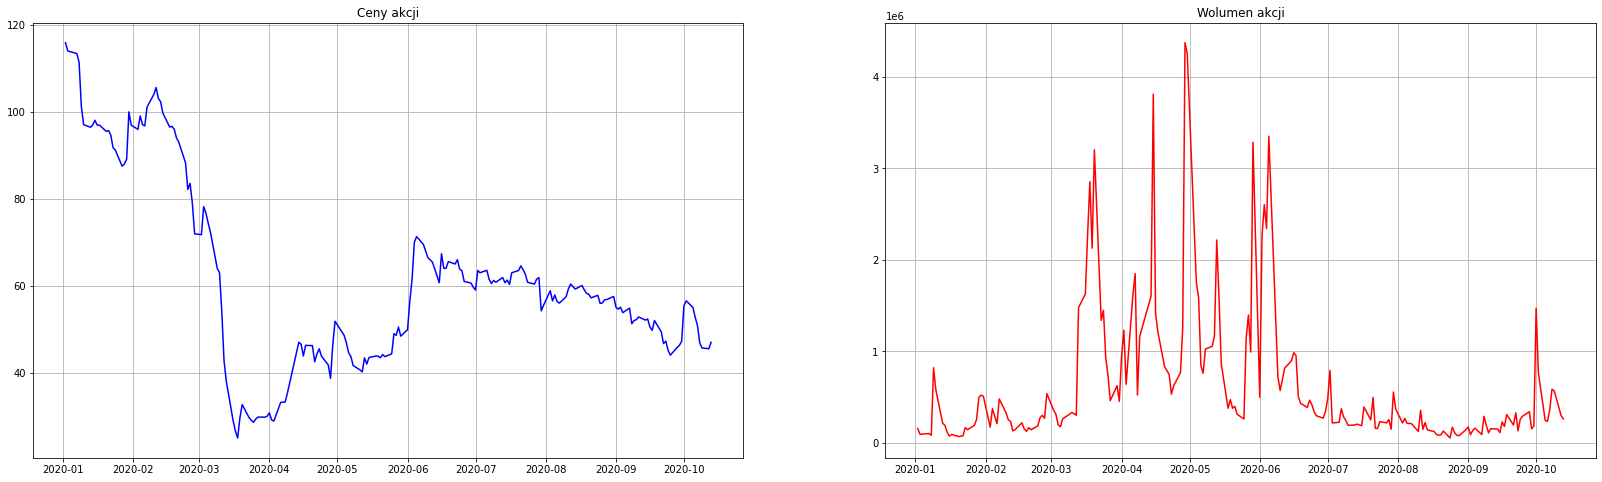

In [ ]:
make_graphics(df)

>> ### 4. Stopa zwrotu akcji

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


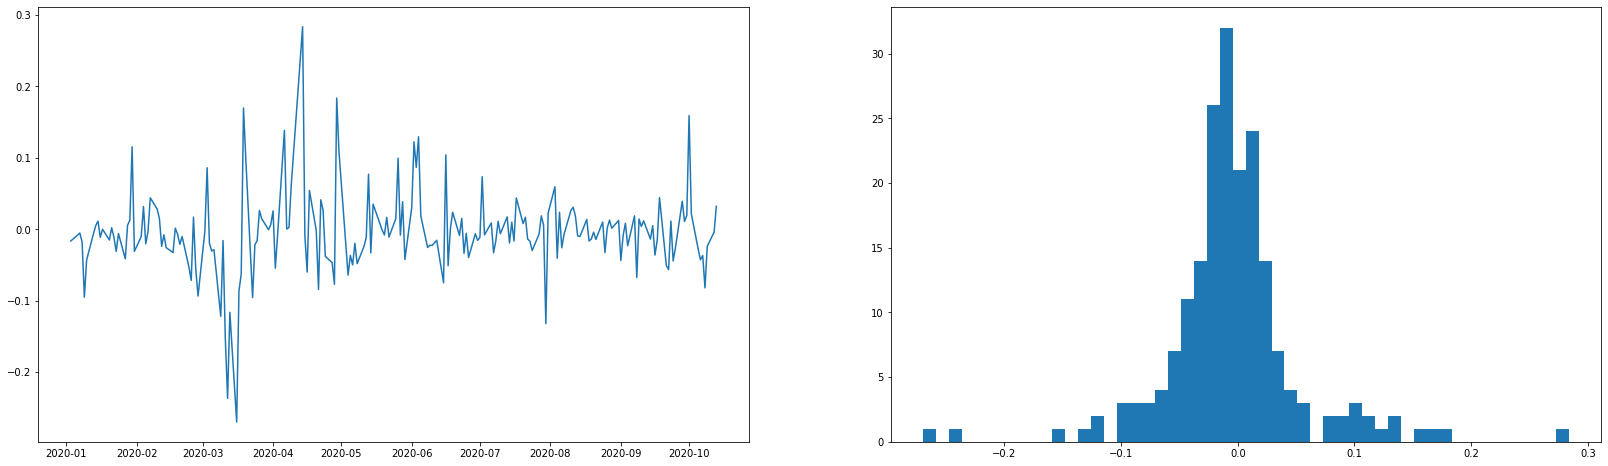

In [ ]:
relative_change(df)

> ## Analiza inwestycji

--------------------wig20.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

               Open     High      Low    Close    Volume
Date                                                    
2020-10-07  1736.62  1741.18  1715.75  1736.61  23829671
2020-10-08  1742.29  1746.68  1711.56  1719.91  22047535
2020-10-09  1718.45  1718.45  1679.01  1698.91  27423797
2020-10-12  1701.76  1707.30  1681.87  1683.21  25089668
2020-10-13  1685.25  1685.25  1659.10  1660.12  26031951
--------------------------------------------------

--------------------ccc.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

             Open   High    Low  Close  Volume
Date                                          
2020-10-07  52.70  53.06  49.31  50.80  358237
2020-10-08  51.30  51.68  46.56  46.80  584907
2020-10-09  46.96  46.97  43.86  45.70  566163
2020-10-12  45.20  46.00  44.25  45.51  298505
2020-10-13  45.00  47.52  45.00  47.00  259101
----------------------

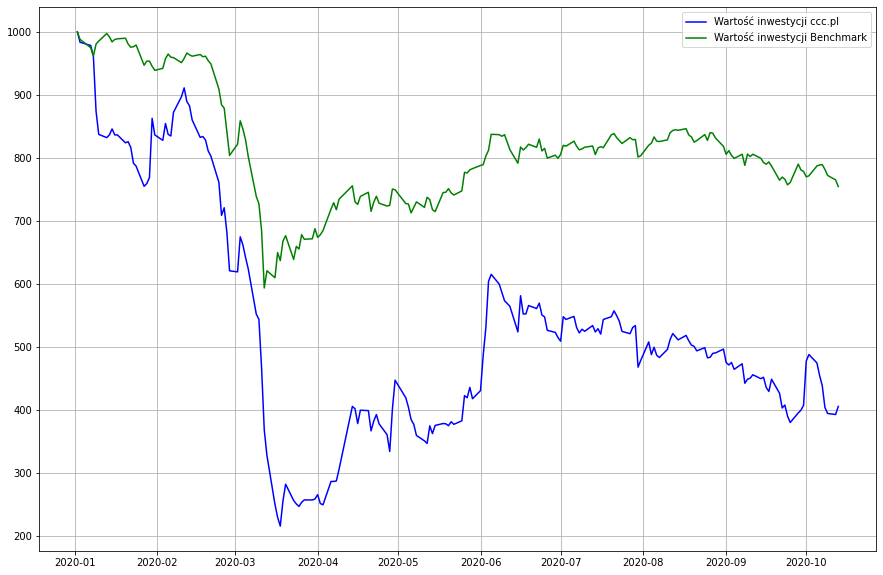

In [ ]:
portfolio_summary(total_investment,stock,start_date,end_date)

# CD Projekt

> ## Pobieranie danych






In [ ]:
stock = 'cdr.pl'
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
total_investment = 1000

In [ ]:
df = get_data(stock,start_date,end_date)

--------------------cdr.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

             Open   High    Low  Close  Volume
Date                                          
2020-10-07  375.3  379.8  365.7  377.1  529453
2020-10-08  381.2  388.9  379.9  388.9  363144
2020-10-09  389.9  389.9  373.5  378.2  367450
2020-10-12  378.0  382.7  371.0  371.0  430801
2020-10-13  371.0  384.2  367.0  383.0  283063
--------------------------------------------------



> ## Analiza danych

>> ### 1. Podstawowe statystyki oraz wstępna eksploracja danych




In [ ]:
basic_summary_data(df)

--------------------------------------------------
Pięc pierwszych oraz pięc rekordów

             Open   High    Low  Close  Volume
Date                                          
2020-01-02  282.0  286.8  281.0  286.8  167487
2020-01-03  287.0  289.8  281.1  286.0  243976
2020-01-07  287.1  288.4  282.9  283.8  212866
2020-01-08  283.5  283.8  277.3  281.1  224466
2020-01-09  284.0  288.6  283.0  288.6  194898
--------------------------------------------------
             Open   High    Low  Close  Volume
Date                                          
2020-10-07  375.3  379.8  365.7  377.1  529453
2020-10-08  381.2  388.9  379.9  388.9  363144
2020-10-09  389.9  389.9  373.5  378.2  367450
2020-10-12  378.0  382.7  371.0  371.0  430801
2020-10-13  371.0  384.2  367.0  383.0  283063
--------------------------------------------------

Podstawowe informacje o danych

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199 entries, 2020-01-02 to 2020-10-13
Data columns (total 5 columns

>> ### 2. Zmiana interwału

In [ ]:
change_interval(df)

--------------------------------------------------
Zmiana interwału na średnią z tygodnia

              Open    High     Low   Close    Volume
Date                                                
2020-09-20  412.56  416.42  403.64  406.34  483857.2
2020-09-27  400.56  409.18  394.96  401.16  423194.2
2020-10-04  415.18  422.42  403.46  411.84  596942.0
2020-10-11  389.88  393.98  377.44  383.54  488461.8
2020-10-18  374.50  383.45  369.00  377.00  356932.0
--------------------------------------------------

Zmiana interwału na ostatnią wartość z miesiąca

             Open   High    Low  Close  Volume
Date                                          
2020-06-30  400.0  405.2  393.8  394.9  293413
2020-07-31  399.6  404.8  398.1  402.0  237486
2020-08-31  446.0  449.9  435.0  438.5  335642
2020-09-30  425.0  430.4  418.4  418.4  428692
2020-10-31  371.0  384.2  367.0  383.0  283063
--------------------------------------------------


>> ### 3. Graficzne przedstawienie danych

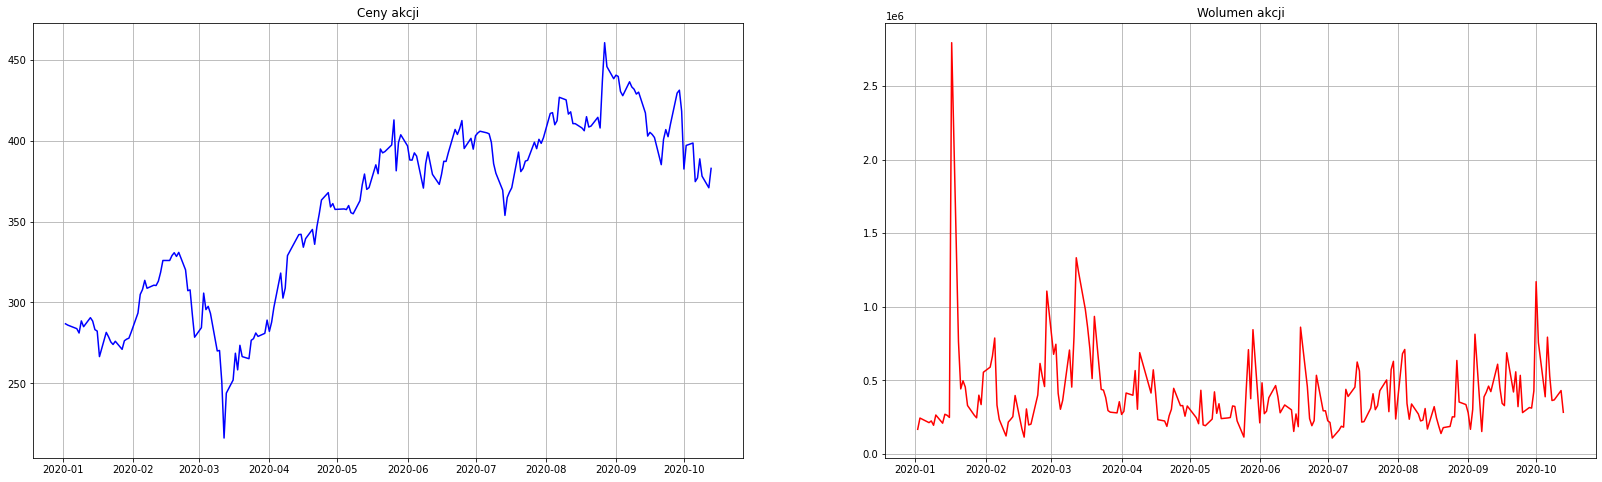

In [ ]:
make_graphics(df)

>> ### 4. Stopa zwrotu akcji

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


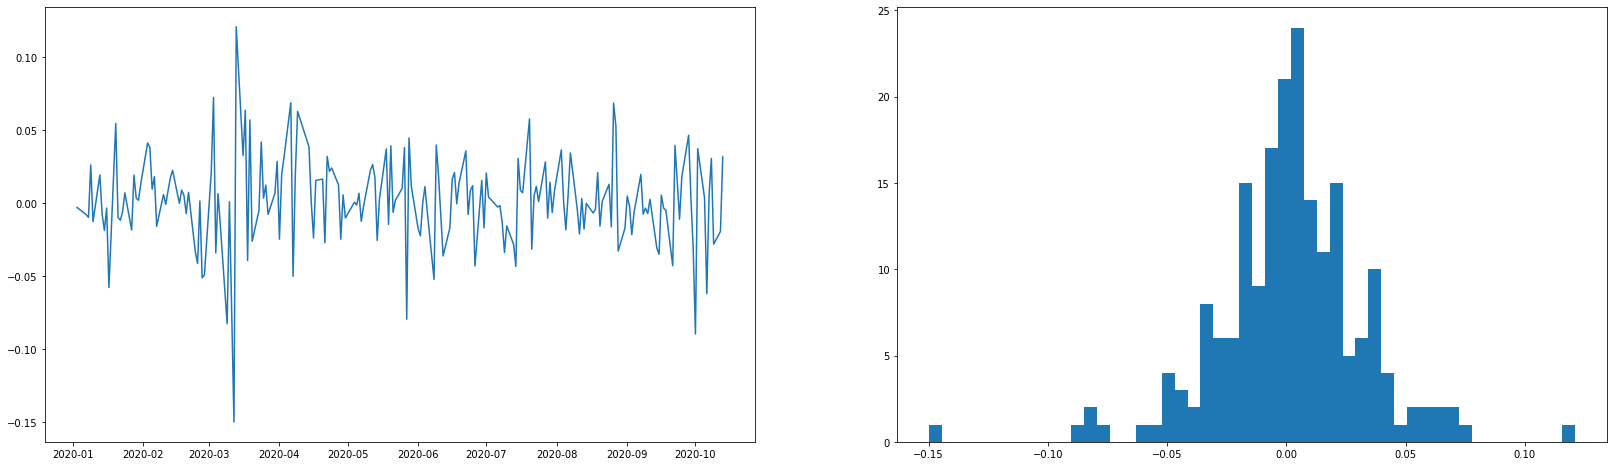

In [ ]:
relative_change(df)

> ## Analiza inwestycji

--------------------wig20.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

               Open     High      Low    Close    Volume
Date                                                    
2020-10-07  1736.62  1741.18  1715.75  1736.61  23829671
2020-10-08  1742.29  1746.68  1711.56  1719.91  22047535
2020-10-09  1718.45  1718.45  1679.01  1698.91  27423797
2020-10-12  1701.76  1707.30  1681.87  1683.21  25089668
2020-10-13  1685.25  1685.25  1659.10  1660.12  26031951
--------------------------------------------------

--------------------cdr.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

             Open   High    Low  Close  Volume
Date                                          
2020-10-07  375.3  379.8  365.7  377.1  529453
2020-10-08  381.2  388.9  379.9  388.9  363144
2020-10-09  389.9  389.9  373.5  378.2  367450
2020-10-12  378.0  382.7  371.0  371.0  430801
2020-10-13  371.0  384.2  367.0  383.0  283063
----------------------

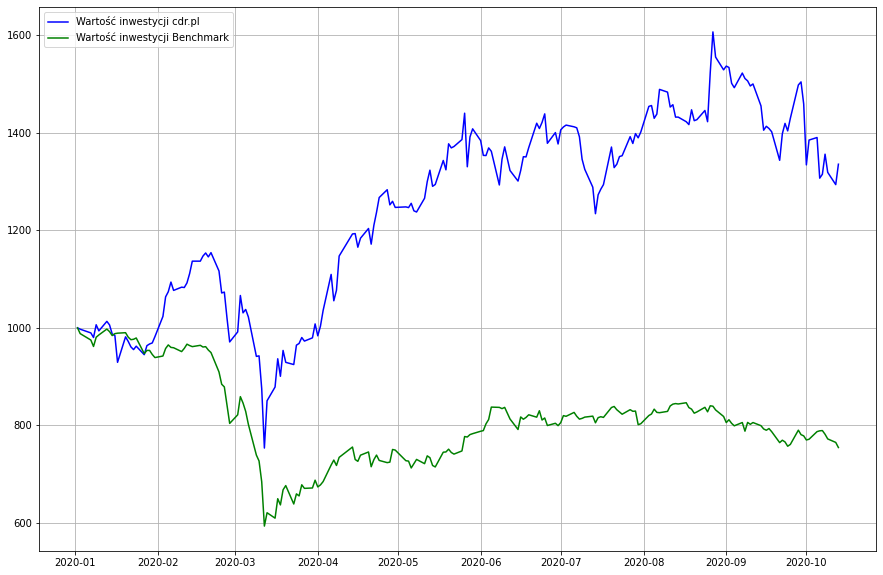

In [ ]:
portfolio_summary(total_investment,stock,start_date,end_date)

# Cyfrowy Polsat

> ## Pobieranie danych






In [ ]:
stock = 'cps.pl'
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
total_investment = 1000

In [ ]:
df = get_data(stock,start_date,end_date)

--------------------cps.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

              Open    High     Low   Close  Volume
Date                                              
2020-10-07  26.181  26.432  25.661  26.239  391505
2020-10-08  26.432  26.547  25.970  26.239  328735
2020-10-09  26.181  26.432  25.796  26.393  241095
2020-10-12  26.374  26.720  26.124  26.239  342670
2020-10-13  26.335  26.335  25.700  25.700  300641
--------------------------------------------------



> ## Analiza danych

>> ### 1. Podstawowe statystyki oraz wstępna eksploracja danych




In [ ]:
basic_summary_data(df)

--------------------------------------------------
Pięc pierwszych oraz pięc rekordów

              Open    High     Low   Close  Volume
Date                                              
2020-01-02  26.913  27.760  26.913  27.356  327308
2020-01-03  27.163  27.298  26.663  27.163  381004
2020-01-07  27.317  27.683  26.797  26.836  173787
2020-01-08  27.163  27.163  26.355  26.663  235643
2020-01-09  27.028  27.336  26.374  26.566  379118
--------------------------------------------------
              Open    High     Low   Close  Volume
Date                                              
2020-10-07  26.181  26.432  25.661  26.239  391505
2020-10-08  26.432  26.547  25.970  26.239  328735
2020-10-09  26.181  26.432  25.796  26.393  241095
2020-10-12  26.374  26.720  26.124  26.239  342670
2020-10-13  26.335  26.335  25.700  25.700  300641
--------------------------------------------------

Podstawowe informacje o danych

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199 entries

>> ### 2. Zmiana interwału

In [ ]:
change_interval(df)

--------------------------------------------------
Zmiana interwału na średnią z tygodnia

               Open     High      Low    Close    Volume
Date                                                    
2020-09-20  25.5498  25.8580  25.2224  25.5576  419667.8
2020-09-27  25.9734  26.5818  25.6000  25.9696  530190.4
2020-10-04  26.2932  26.7012  26.0774  26.2778  299719.8
2020-10-11  26.3468  26.6512  25.9386  26.3122  308474.4
2020-10-18  26.3545  26.5275  25.9120  25.9695  321655.5
--------------------------------------------------

Zmiana interwału na ostatnią wartość z miesiąca

              Open    High     Low   Close   Volume
Date                                               
2020-06-30  26.297  26.316  25.257  25.315   728453
2020-07-31  27.779  27.779  26.682  26.797   681394
2020-08-31  26.990  27.683  26.951  27.683  1563951
2020-09-30  26.509  26.509  25.989  26.008   418101
2020-10-31  26.335  26.335  25.700  25.700   300641
---------------------------------------------

>> ### 3. Graficzne przedstawienie danych

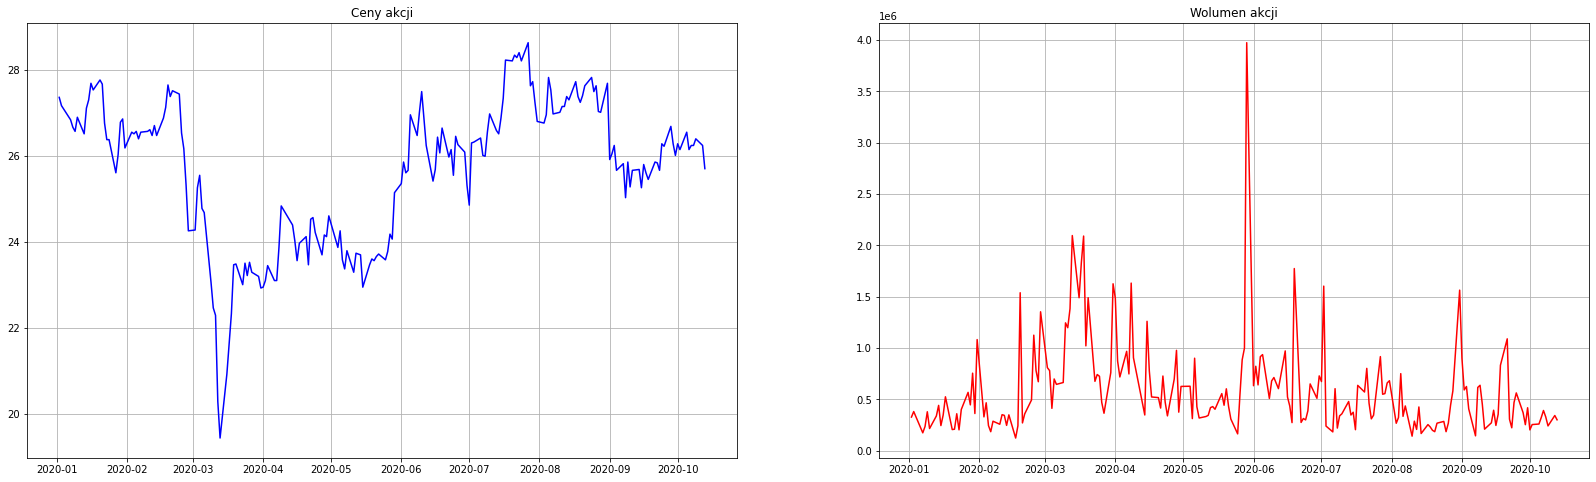

In [ ]:
make_graphics(df)

>> ### 4. Stopa zwrotu akcji

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


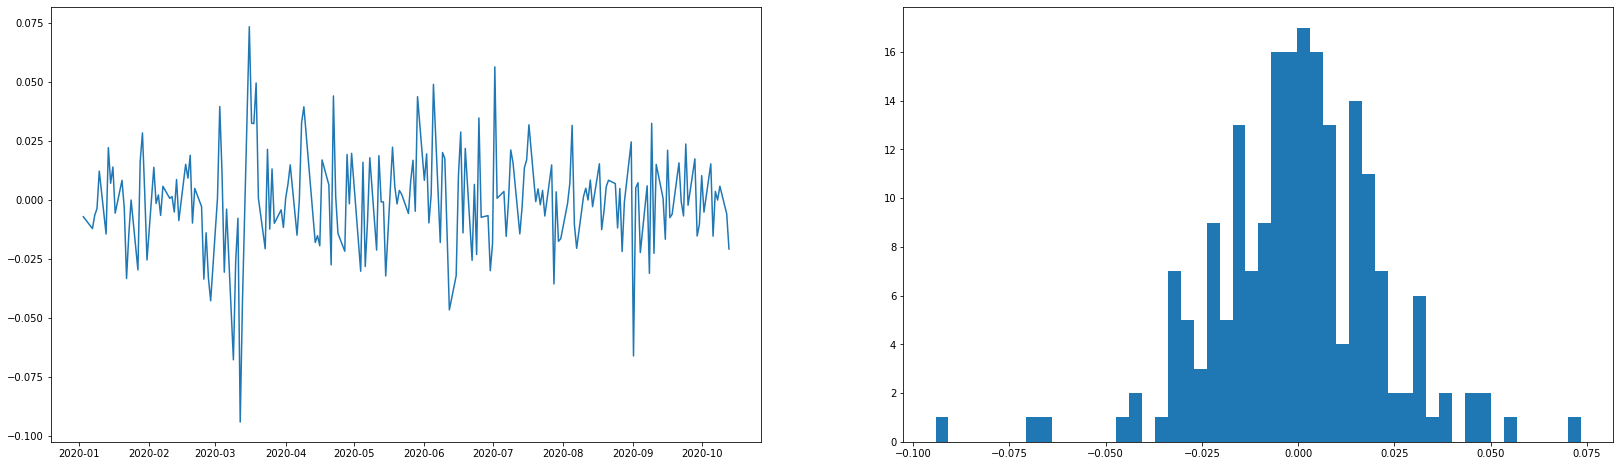

In [ ]:
relative_change(df)

> ## Analiza inwestycji

--------------------wig20.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

               Open     High      Low    Close    Volume
Date                                                    
2020-10-07  1736.62  1741.18  1715.75  1736.61  23829671
2020-10-08  1742.29  1746.68  1711.56  1719.91  22047535
2020-10-09  1718.45  1718.45  1679.01  1698.91  27423797
2020-10-12  1701.76  1707.30  1681.87  1683.21  25089668
2020-10-13  1685.25  1685.25  1659.10  1660.12  26031951
--------------------------------------------------

--------------------cps.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

              Open    High     Low   Close  Volume
Date                                              
2020-10-07  26.181  26.432  25.661  26.239  391505
2020-10-08  26.432  26.547  25.970  26.239  328735
2020-10-09  26.181  26.432  25.796  26.393  241095
2020-10-12  26.374  26.720  26.124  26.239  342670
2020-10-13  26.335  26.335  25.700  25.700  3

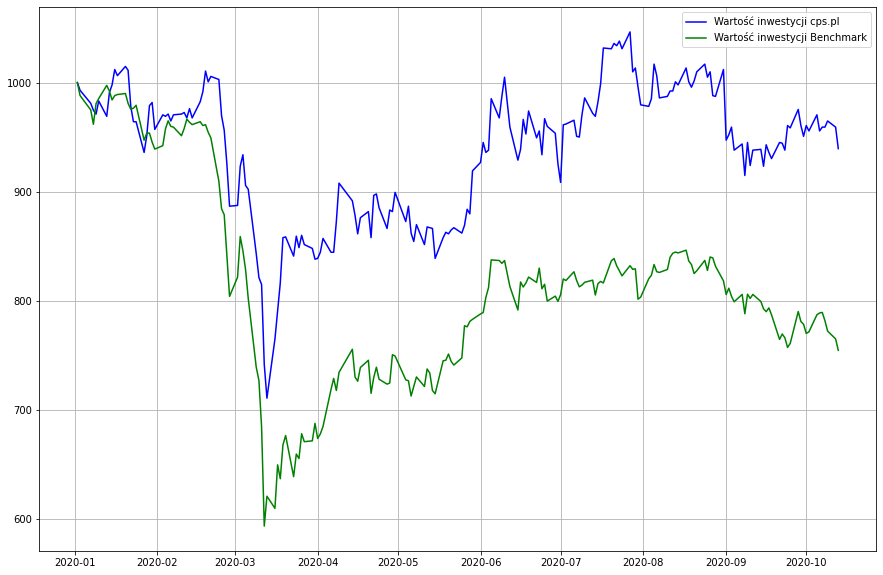

In [ ]:
portfolio_summary(total_investment,stock,start_date,end_date)

> ## Pobieranie danych






In [ ]:
stock = 'dnp.pl'
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
total_investment = 1000

In [ ]:
df = get_data(stock,start_date,end_date)

--------------------dnp.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

             Open   High    Low  Close  Volume
Date                                          
2020-10-07  227.0  228.8  220.2  222.2  225379
2020-10-08  222.2  224.0  217.4  217.4  163329
2020-10-09  216.2  219.8  209.4  215.2  260019
2020-10-12  215.0  218.0  213.2  217.0  497316
2020-10-13  215.4  219.0  211.4  214.6  545353
--------------------------------------------------



> ## Analiza danych

>> ### 1. Podstawowe statystyki oraz wstępna eksploracja danych




In [ ]:
basic_summary_data(df)

--------------------------------------------------
Pięc pierwszych oraz pięc rekordów

             Open   High    Low  Close  Volume
Date                                          
2020-01-02  144.3  145.2  142.0  145.2  161952
2020-01-03  144.7  144.7  141.8  141.8  159715
2020-01-07  141.7  145.4  140.1  143.3  164973
2020-01-08  142.5  142.9  141.8  142.3   51186
2020-01-09  142.7  145.3  142.7  145.2  105254
--------------------------------------------------
             Open   High    Low  Close  Volume
Date                                          
2020-10-07  227.0  228.8  220.2  222.2  225379
2020-10-08  222.2  224.0  217.4  217.4  163329
2020-10-09  216.2  219.8  209.4  215.2  260019
2020-10-12  215.0  218.0  213.2  217.0  497316
2020-10-13  215.4  219.0  211.4  214.6  545353
--------------------------------------------------

Podstawowe informacje o danych

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199 entries, 2020-01-02 to 2020-10-13
Data columns (total 5 columns

>> ### 2. Zmiana interwału

In [ ]:
change_interval(df)

--------------------------------------------------
Zmiana interwału na średnią z tygodnia

              Open    High     Low   Close    Volume
Date                                                
2020-09-20  225.72  229.72  222.88  227.12  215765.8
2020-09-27  228.76  232.48  223.68  226.68   85169.8
2020-10-04  228.48  231.60  226.28  228.48  154416.8
2020-10-11  224.00  226.24  218.88  221.80  168459.4
2020-10-18  215.20  218.50  212.30  215.80  521334.5
--------------------------------------------------

Zmiana interwału na ostatnią wartość z miesiąca

             Open   High    Low  Close  Volume
Date                                          
2020-06-30  197.7  202.4  197.2  200.6  285865
2020-07-31  202.8  208.0  201.2  207.8  211105
2020-08-31  227.0  230.4  222.6  223.6  286607
2020-09-30  230.2  233.0  225.6  227.8  265160
2020-10-31  215.4  219.0  211.4  214.6  545353
--------------------------------------------------


>> ### 3. Graficzne przedstawienie danych

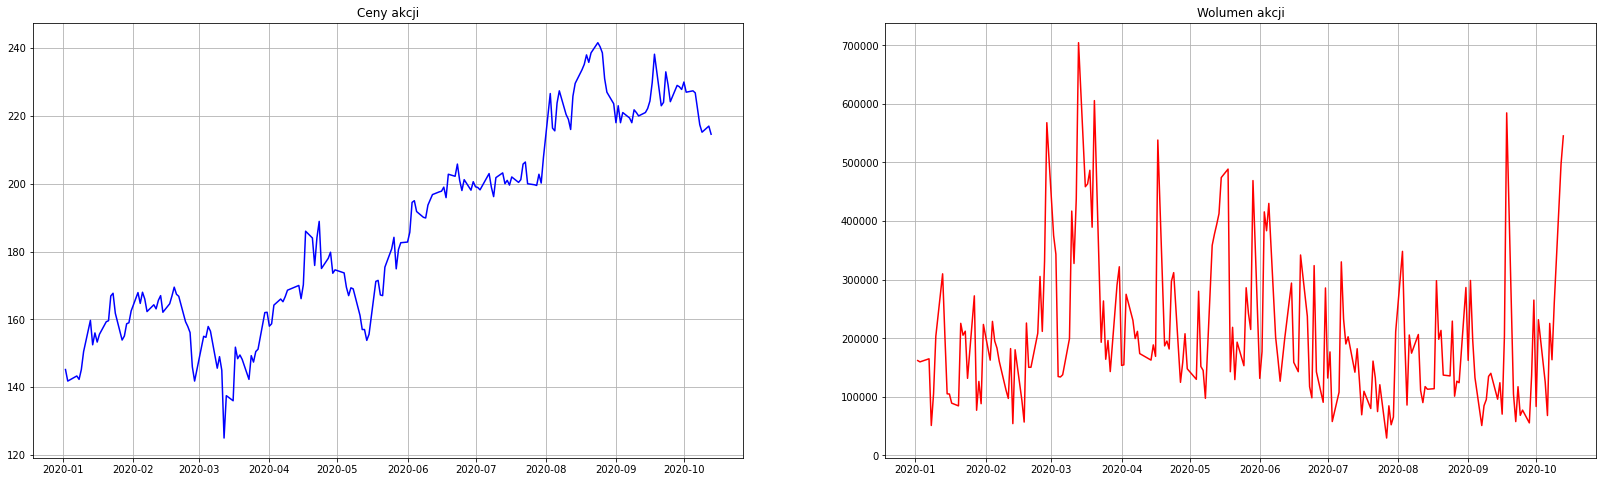

In [ ]:
make_graphics(df)

>> ### 4. Stopa zwrotu akcji

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


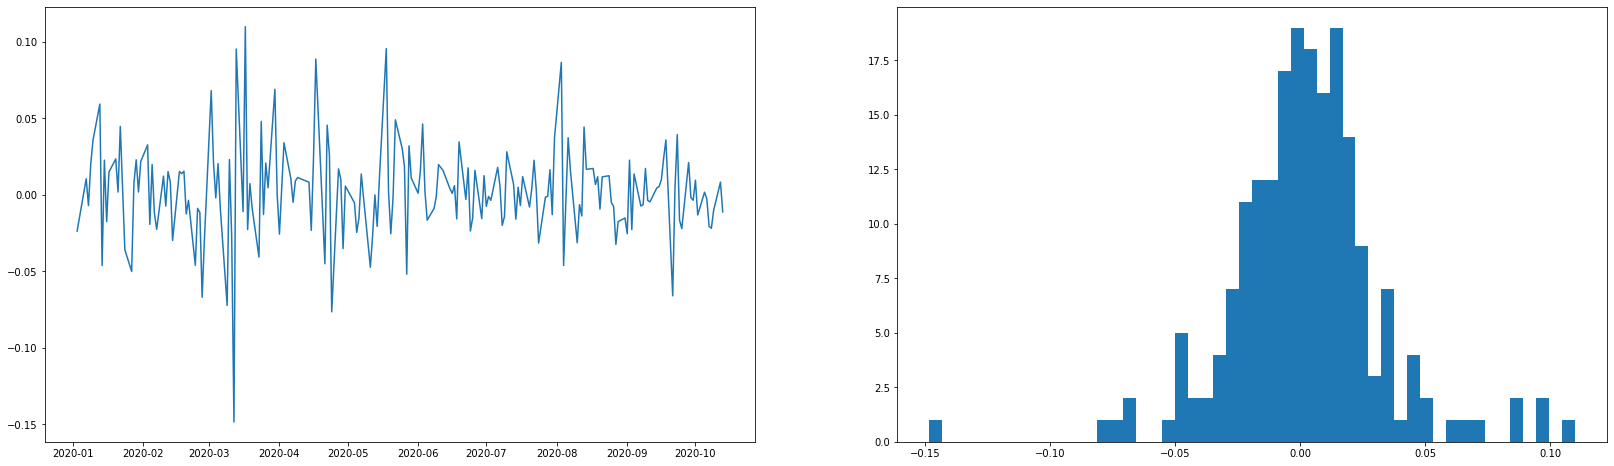

In [ ]:
relative_change(df)

> ## Analiza inwestycji

--------------------wig20.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

               Open     High      Low    Close    Volume
Date                                                    
2020-10-07  1736.62  1741.18  1715.75  1736.61  23829671
2020-10-08  1742.29  1746.68  1711.56  1719.91  22047535
2020-10-09  1718.45  1718.45  1679.01  1698.91  27423797
2020-10-12  1701.76  1707.30  1681.87  1683.21  25089668
2020-10-13  1685.25  1685.25  1659.10  1660.12  26031951
--------------------------------------------------

--------------------dnp.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

             Open   High    Low  Close  Volume
Date                                          
2020-10-07  227.0  228.8  220.2  222.2  225379
2020-10-08  222.2  224.0  217.4  217.4  163329
2020-10-09  216.2  219.8  209.4  215.2  260019
2020-10-12  215.0  218.0  213.2  217.0  497316
2020-10-13  215.4  219.0  211.4  214.6  545353
----------------------

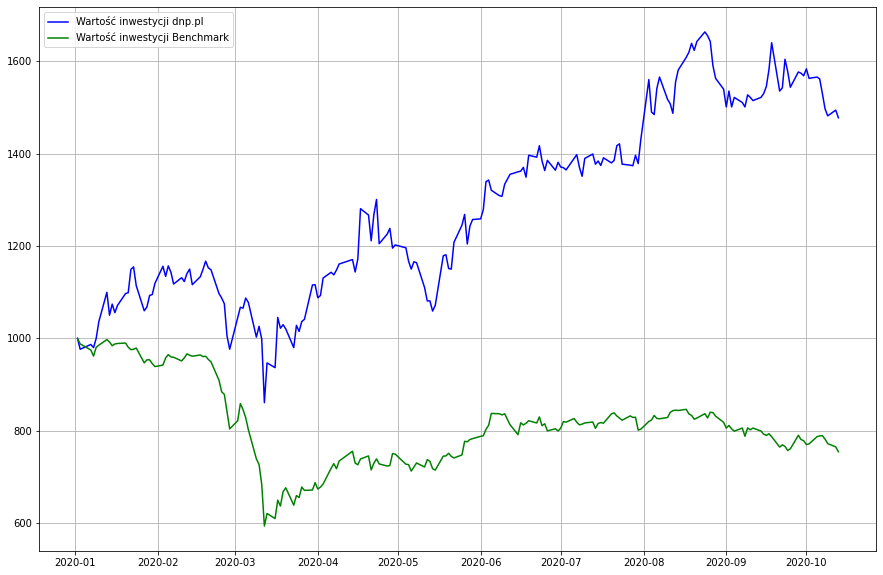

In [ ]:
portfolio_summary(total_investment,stock,start_date,end_date)

# Dino


> ## Preparing data

In [11]:
name = 'Dino Polska'
query = stocks_at_WIG20['Full_name'] == name
stock = stocks_at_WIG20[query]
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
total_investment = 1000

In [12]:
df = get_data(stock,start_date,end_date)

> ## Data mining

>> ### 1. Basic information about data




In [13]:
basic_summary_data(df)

--------------------------------------------------
5 first and 5 last record

Attributes  Close   High    Low   Open  Volume
Symbols    dnp.pl dnp.pl dnp.pl dnp.pl  dnp.pl
Date                                          
2020-01-02  145.2  145.2  142.0  144.3  161952
2020-01-03  141.8  144.7  141.8  144.7  159715
2020-01-07  143.3  145.4  140.1  141.7  164973
2020-01-08  142.3  142.9  141.8  142.5   51186
2020-01-09  145.2  145.3  142.7  142.7  105254
--------------------------------------------------
Attributes  Close   High    Low   Open  Volume
Symbols    dnp.pl dnp.pl dnp.pl dnp.pl  dnp.pl
Date                                          
2020-10-08  217.4  224.0  217.4  222.2  163329
2020-10-09  215.2  219.8  209.4  216.2  260019
2020-10-12  217.0  218.0  213.2  215.0  497316
2020-10-13  214.6  219.0  211.4  215.4  545353
2020-10-14  216.2  222.2  211.0  211.0  697791
--------------------------------------------------

Summary of dataframe

<class 'pandas.core.frame.DataFrame'>
Datetim

>> ### 2. Change interval

In [14]:
change_interval(df)

--------------------------------------------------
Week's mean

Attributes       Close        High         Low    Open         Volume
Symbols         dnp.pl      dnp.pl      dnp.pl  dnp.pl         dnp.pl
Date                                                                 
2020-09-20  227.120000  229.720000  222.880000  225.72  215765.800000
2020-09-27  226.680000  232.480000  223.680000  228.76   85169.800000
2020-10-04  228.480000  231.600000  226.280000  228.48  154416.800000
2020-10-11  221.800000  226.240000  218.880000  224.00  168459.400000
2020-10-18  215.933333  219.733333  211.866667  213.80  580153.333333
--------------------------------------------------

Month's last value

Attributes  Close   High    Low   Open  Volume
Symbols    dnp.pl dnp.pl dnp.pl dnp.pl  dnp.pl
Date                                          
2020-06-30  200.6  202.4  197.2  197.7  285865
2020-07-31  207.8  208.0  201.2  202.8  211105
2020-08-31  223.6  230.4  222.6  227.0  286607
2020-09-30  227.8  233

>> ### 3. Visualization data

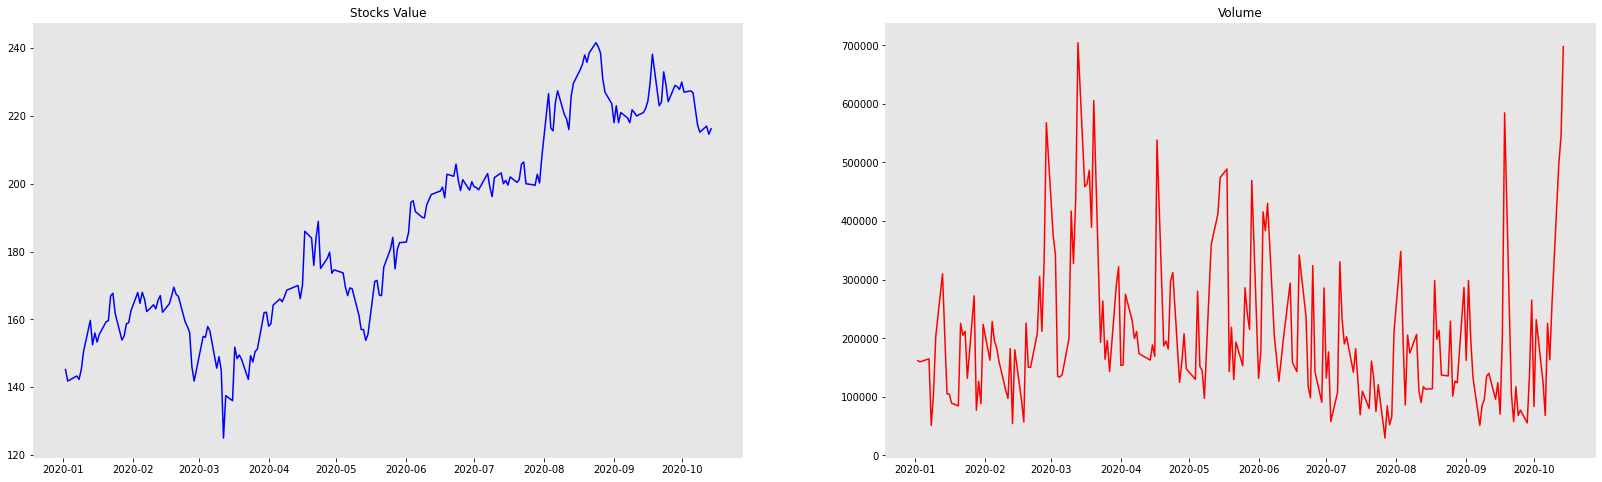

In [15]:
make_graphics(df)

>> ### 4. Relative change

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


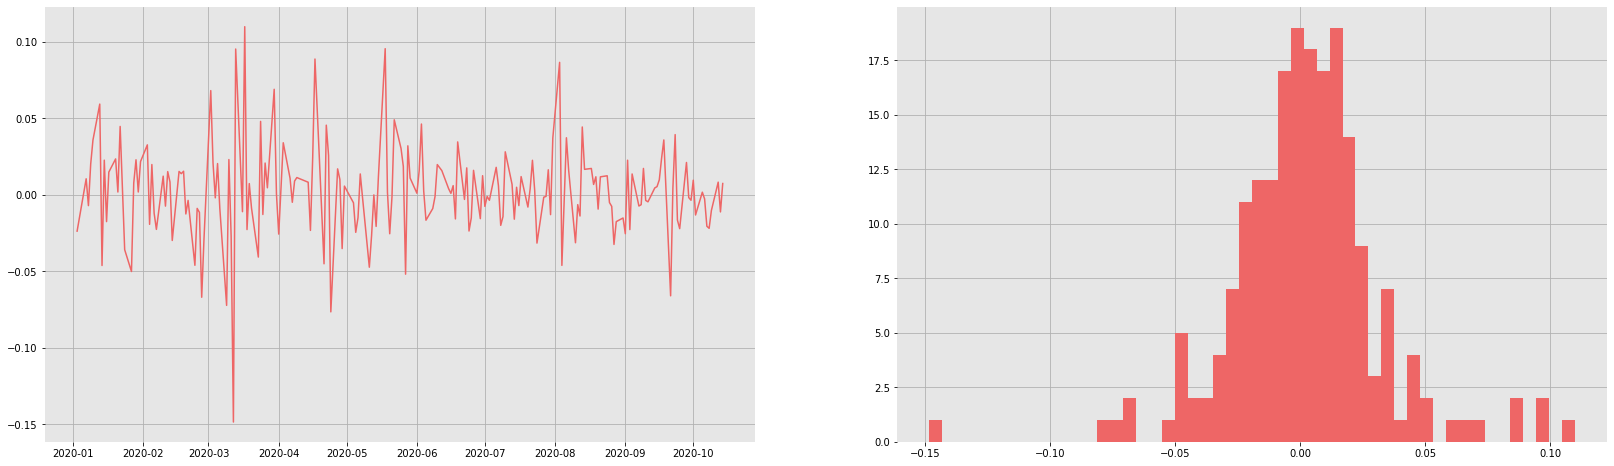

In [16]:
relative_change(df)

> ## Analysis of our investment

--------------------------------------------------
Our investment 1000.0 PLN at Dino Polska on 2020-10-15 is worth 1488.98 PLN
Percentage change between the current and a initial value of investment is 48.9%
Ratio investment to benchmark is 96.13%
--------------------------------------------------



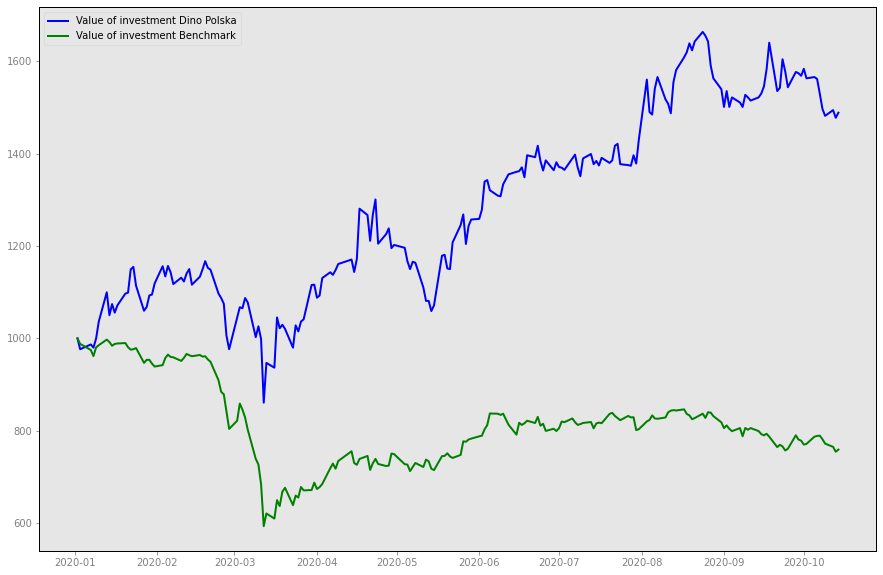

In [41]:
portfolio_summary(total_investment,stock,start_date,end_date)

# Jastrzębska Spółka Węglowa

> ## Pobieranie danych






In [ ]:
stock = 'jsw.pl'
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
total_investment = 1000

In [ ]:
df = get_data(stock,start_date,end_date)

--------------------jsw.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

             Open   High    Low  Close   Volume
Date                                           
2020-10-07  26.20  26.50  25.52  26.31   639146
2020-10-08  26.35  26.76  24.50  24.72  1227022
2020-10-09  24.00  24.80  22.56  24.48  1762636
2020-10-12  24.96  25.75  23.80  24.82  1123703
2020-10-13  24.59  25.14  24.00  24.00   559402
--------------------------------------------------



> ## Analiza danych

>> ### 1. Podstawowe statystyki oraz wstępna eksploracja danych




In [ ]:
basic_summary_data(df)

--------------------------------------------------
Pięc pierwszych oraz pięc rekordów

             Open   High    Low  Close   Volume
Date                                           
2020-01-02  21.86  24.24  21.68  24.24  2279639
2020-01-03  23.96  24.14  23.14  23.28  1517380
2020-01-07  23.74  24.58  23.68  24.22  1477786
2020-01-08  23.98  25.50  21.70  21.88  3412091
2020-01-09  22.30  22.74  21.44  22.44  1971931
--------------------------------------------------
             Open   High    Low  Close   Volume
Date                                           
2020-10-07  26.20  26.50  25.52  26.31   639146
2020-10-08  26.35  26.76  24.50  24.72  1227022
2020-10-09  24.00  24.80  22.56  24.48  1762636
2020-10-12  24.96  25.75  23.80  24.82  1123703
2020-10-13  24.59  25.14  24.00  24.00   559402
--------------------------------------------------

Podstawowe informacje o danych

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199 entries, 2020-01-02 to 2020-10-13
Data columns (t

>> ### 2. Zmiana interwału

In [ ]:
change_interval(df)

--------------------------------------------------
Zmiana interwału na średnią z tygodnia

              Open    High     Low   Close     Volume
Date                                                 
2020-09-20  25.838  27.656  25.100  26.694  2805242.8
2020-09-27  24.904  26.282  23.510  24.158  2236356.4
2020-10-04  25.622  26.582  24.730  25.544  1068293.4
2020-10-11  25.540  26.422  24.656  25.662  1193853.6
2020-10-18  24.775  25.445  23.900  24.410   841552.5
--------------------------------------------------

Zmiana interwału na ostatnią wartość z miesiąca

             Open   High     Low   Close   Volume
Date                                             
2020-06-30  18.89  19.00  18.570  18.700   235362
2020-07-31  15.00  16.90  14.965  16.495  1010503
2020-08-31  15.30  15.76  15.265  15.705   420874
2020-09-30  25.01  26.24  24.500  25.650   799155
2020-10-31  24.59  25.14  24.000  24.000   559402
--------------------------------------------------


>> ### 3. Graficzne przedstawienie danych

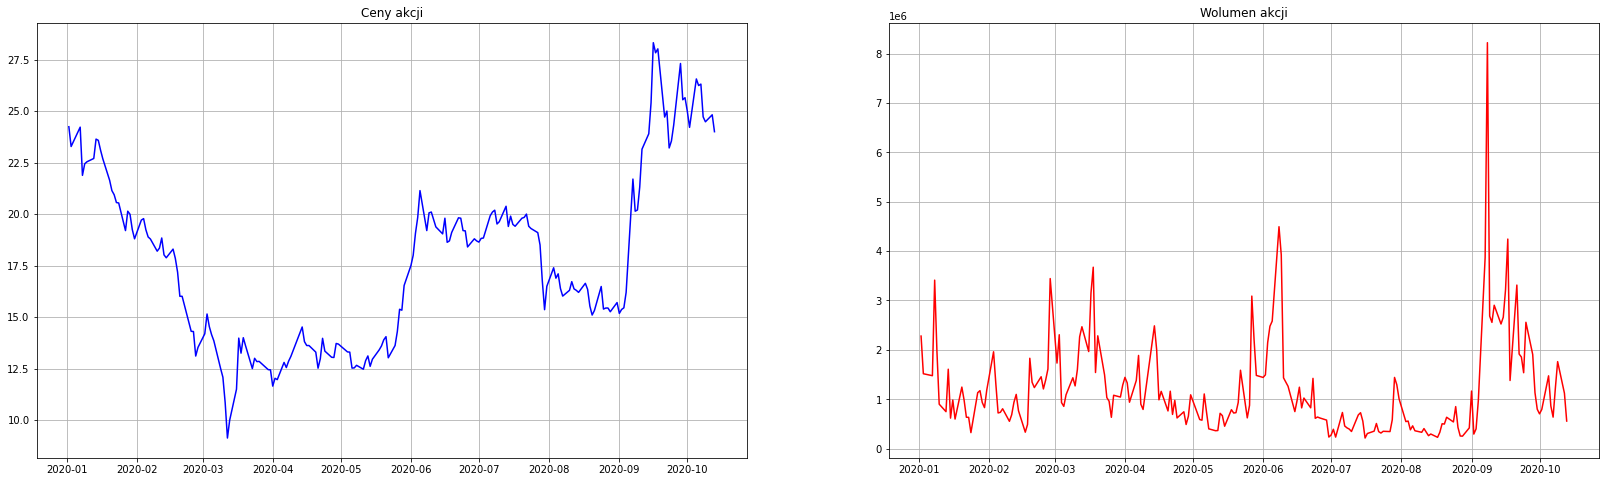

In [ ]:
make_graphics(df)

>> ### 4. Stopa zwrotu akcji

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


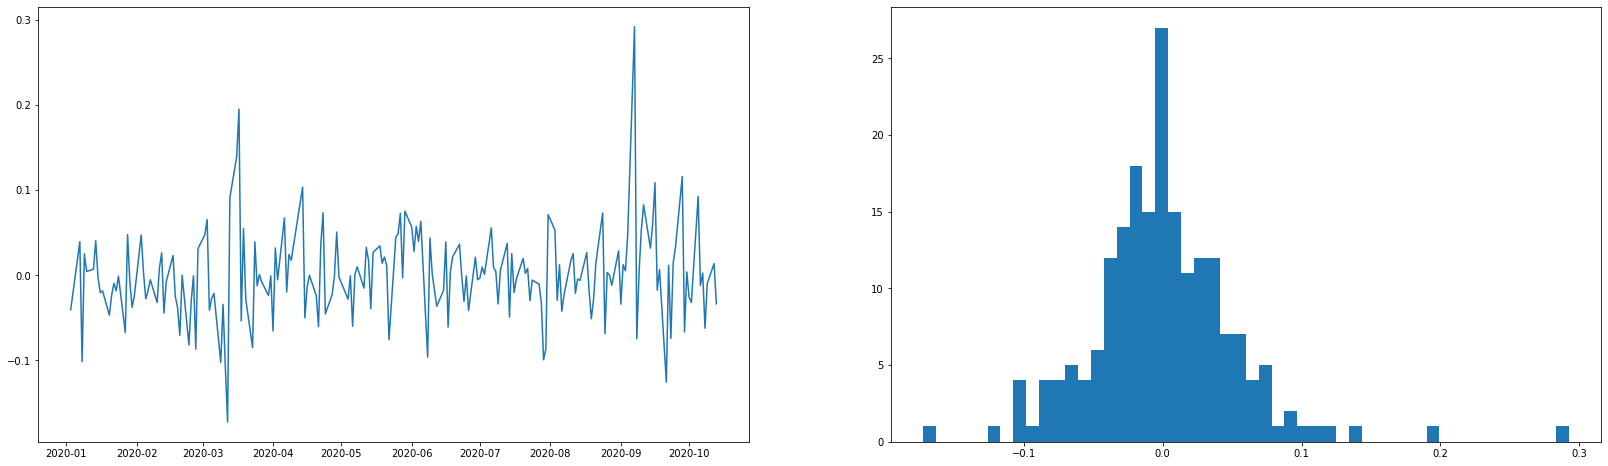

In [ ]:
relative_change(df)

> ## Analiza inwestycji

--------------------wig20.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

               Open     High      Low    Close    Volume
Date                                                    
2020-10-07  1736.62  1741.18  1715.75  1736.61  23829671
2020-10-08  1742.29  1746.68  1711.56  1719.91  22047535
2020-10-09  1718.45  1718.45  1679.01  1698.91  27423797
2020-10-12  1701.76  1707.30  1681.87  1683.21  25089668
2020-10-13  1685.25  1685.25  1659.10  1660.12  26031951
--------------------------------------------------

--------------------jsw.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

             Open   High    Low  Close   Volume
Date                                           
2020-10-07  26.20  26.50  25.52  26.31   639146
2020-10-08  26.35  26.76  24.50  24.72  1227022
2020-10-09  24.00  24.80  22.56  24.48  1762636
2020-10-12  24.96  25.75  23.80  24.82  1123703
2020-10-13  24.59  25.14  24.00  24.00   559402
---------------

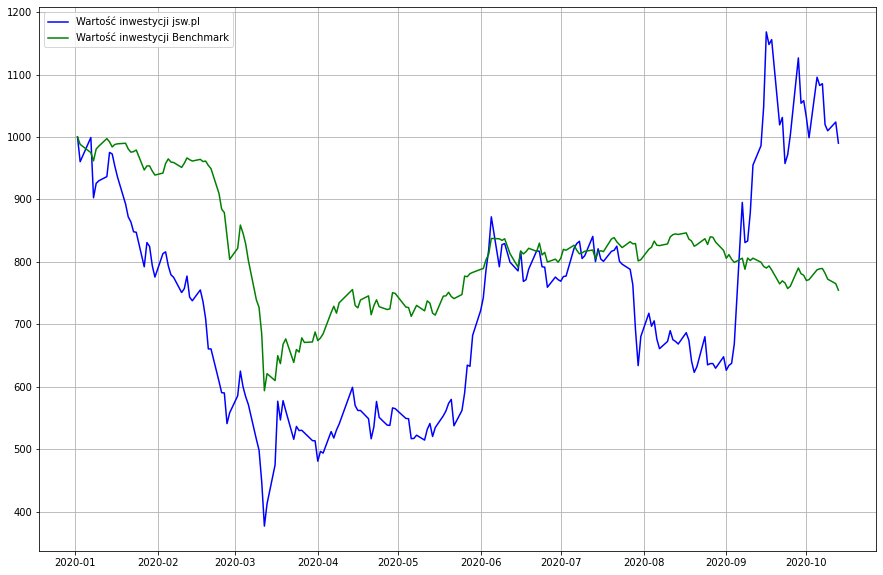

In [ ]:
portfolio_summary(total_investment,stock,start_date,end_date)

# KGHM

> ## Pobieranie danych






In [ ]:
stock = 'kgh.pl'
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
total_investment = 1000

In [ ]:
df = get_data(stock,start_date,end_date)

--------------------kgh.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

              Open    High     Low   Close  Volume
Date                                              
2020-10-07  116.85  120.00  115.80  120.00  640460
2020-10-08  120.90  121.40  115.00  116.15  590399
2020-10-09  115.50  119.95  115.50  119.95  440087
2020-10-12  120.70  125.20  119.95  121.90  776814
2020-10-13  122.00  122.00  118.05  119.00  225824
--------------------------------------------------



> ## Analiza danych

>> ### 1. Podstawowe statystyki oraz wstępna eksploracja danych




In [ ]:
basic_summary_data(df)

--------------------------------------------------
Pięc pierwszych oraz pięc rekordów

             Open   High    Low  Close  Volume
Date                                          
2020-01-02  96.56  98.20  96.56  97.90  232235
2020-01-03  96.20  97.00  95.24  96.12  317912
2020-01-07  96.00  97.20  95.00  95.96  314584
2020-01-08  95.94  96.46  94.96  94.96  251166
2020-01-09  96.06  97.36  96.06  96.90  520817
--------------------------------------------------
              Open    High     Low   Close  Volume
Date                                              
2020-10-07  116.85  120.00  115.80  120.00  640460
2020-10-08  120.90  121.40  115.00  116.15  590399
2020-10-09  115.50  119.95  115.50  119.95  440087
2020-10-12  120.70  125.20  119.95  121.90  776814
2020-10-13  122.00  122.00  118.05  119.00  225824
--------------------------------------------------

Podstawowe informacje o danych

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199 entries, 2020-01-02 to 2020-10-13
D

>> ### 2. Zmiana interwału

In [ ]:
change_interval(df)

--------------------------------------------------
Zmiana interwału na średnią z tygodnia

              Open    High     Low   Close    Volume
Date                                                
2020-09-20  135.22  136.52  133.86  134.88  685294.8
2020-09-27  123.69  125.98  120.61  122.00  534514.6
2020-10-04  118.34  119.52  115.70  117.57  475353.0
2020-10-11  117.33  119.99  115.28  118.32  559873.0
2020-10-18  121.35  123.60  119.00  120.45  501319.0
--------------------------------------------------

Zmiana interwału na ostatnią wartość z miesiąca

              Open    High     Low   Close  Volume
Date                                              
2020-06-30   90.50   91.22   89.60   90.90  861061
2020-07-31  125.10  128.70  125.10  126.05  999532
2020-08-31  136.60  138.20  136.05  136.85  729786
2020-09-30  117.65  118.40  114.50  118.00  572246
2020-10-31  122.00  122.00  118.05  119.00  225824
--------------------------------------------------


>> ### 3. Graficzne przedstawienie danych

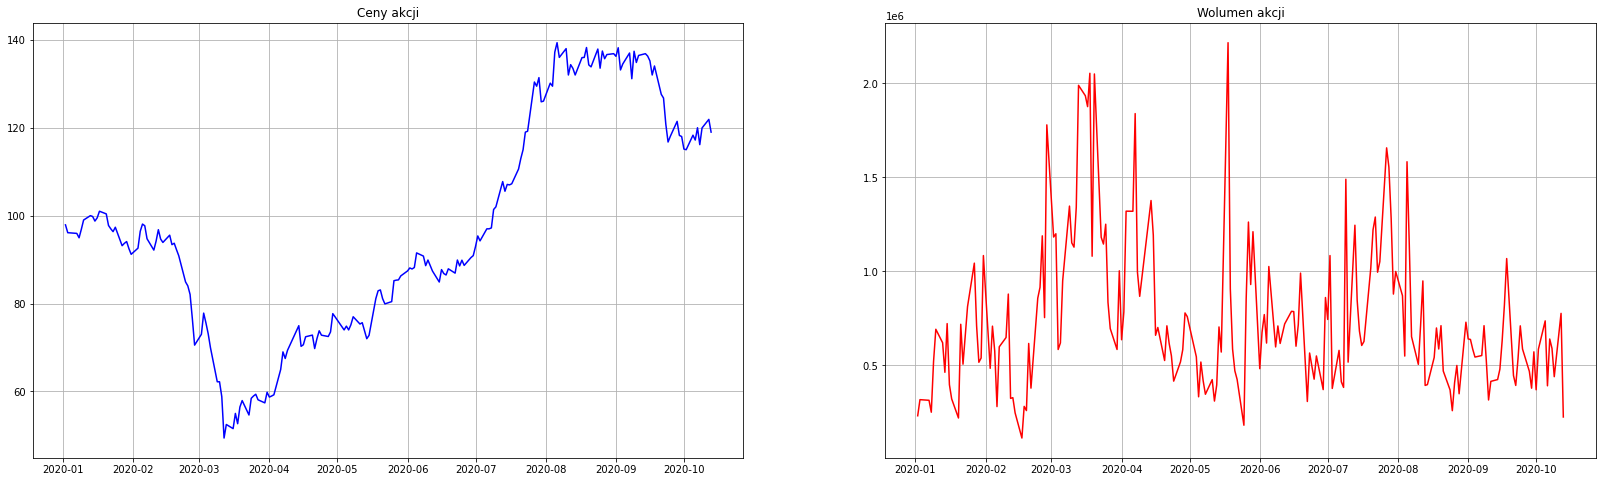

In [ ]:
make_graphics(df)

>> ### 4. Stopa zwrotu akcji

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


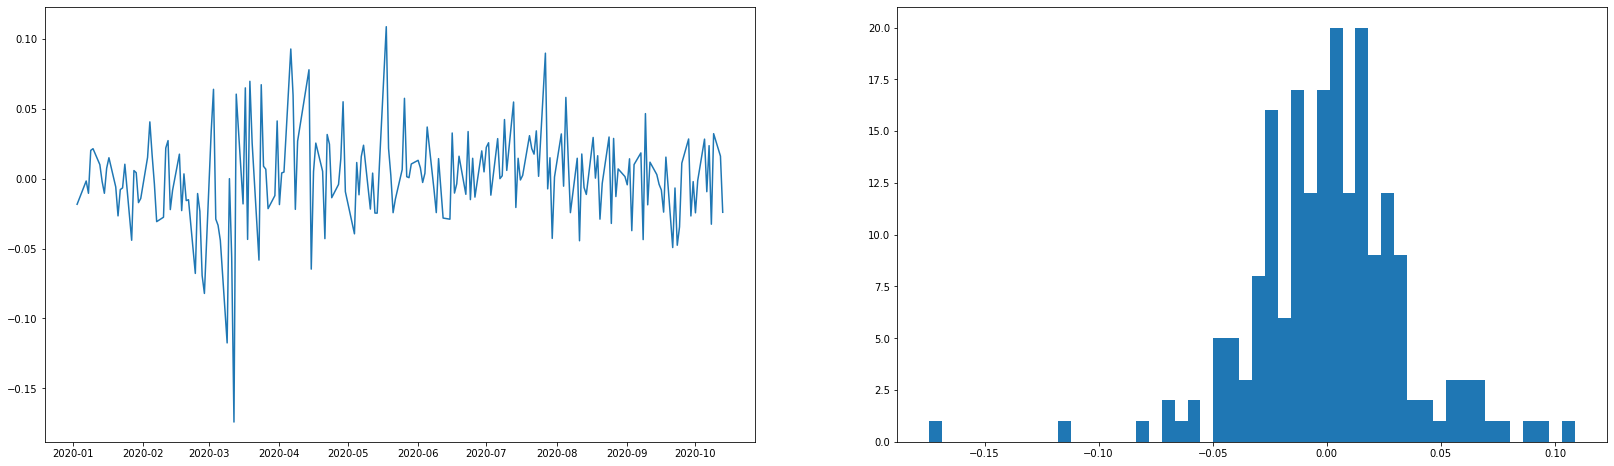

In [ ]:
relative_change(df)

> ## Analiza inwestycji

--------------------wig20.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

               Open     High      Low    Close    Volume
Date                                                    
2020-10-07  1736.62  1741.18  1715.75  1736.61  23829671
2020-10-08  1742.29  1746.68  1711.56  1719.91  22047535
2020-10-09  1718.45  1718.45  1679.01  1698.91  27423797
2020-10-12  1701.76  1707.30  1681.87  1683.21  25089668
2020-10-13  1685.25  1685.25  1659.10  1660.12  26031951
--------------------------------------------------

--------------------kgh.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

              Open    High     Low   Close  Volume
Date                                              
2020-10-07  116.85  120.00  115.80  120.00  640460
2020-10-08  120.90  121.40  115.00  116.15  590399
2020-10-09  115.50  119.95  115.50  119.95  440087
2020-10-12  120.70  125.20  119.95  121.90  776814
2020-10-13  122.00  122.00  118.05  119.00  2

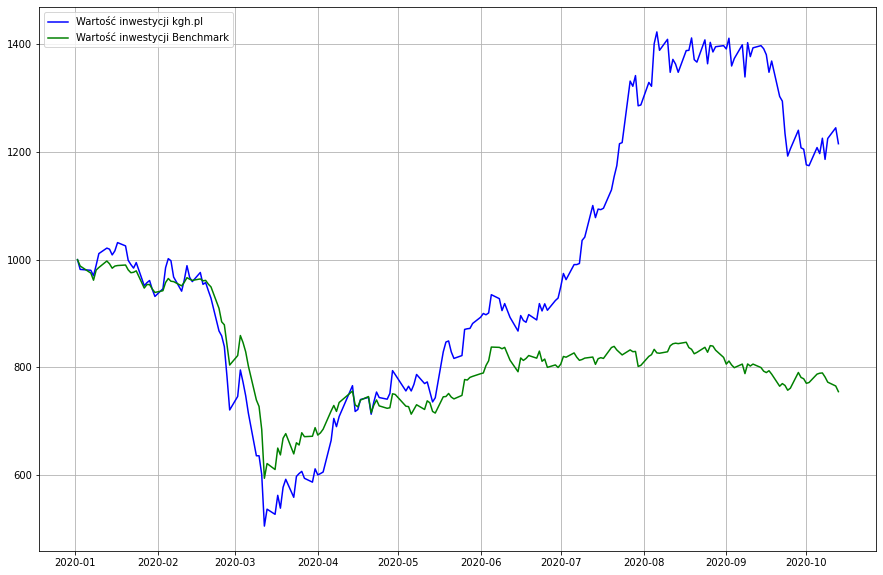

In [ ]:
portfolio_summary(total_investment,stock,start_date,end_date)

# LPP

> ## Pobieranie danych






In [ ]:
stock = 'lpp.pl'
start_date = dt.datetime(2020,1,1)
end_date = dt.date.today()
total_investment = 1000

In [ ]:
df = get_data(stock,start_date,end_date)

--------------------lpp.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

            Open  High   Low  Close  Volume
Date                                       
2020-10-07  7040  7095  6810   6900    1510
2020-10-08  6895  6970  6510   6650    2701
2020-10-09  6660  6740  6505   6615    2556
2020-10-12  6650  6750  6600   6675    1646
2020-10-13  6660  6660  6525   6560    1005
--------------------------------------------------



> ## Analiza danych

>> ### 1. Podstawowe statystyki oraz wstępna eksploracja danych




In [ ]:
basic_summary_data(df)

--------------------------------------------------
Pięc pierwszych oraz pięc rekordów

            Open  High   Low  Close  Volume
Date                                       
2020-01-02  8740  8850  8705   8845    2307
2020-01-03  8720  8825  8600   8825    2090
2020-01-07  8775  9035  8700   8740    2905
2020-01-08  8600  8720  8530   8650    3252
2020-01-09  8790  8790  8660   8705    2109
--------------------------------------------------
            Open  High   Low  Close  Volume
Date                                       
2020-10-07  7040  7095  6810   6900    1510
2020-10-08  6895  6970  6510   6650    2701
2020-10-09  6660  6740  6505   6615    2556
2020-10-12  6650  6750  6600   6675    1646
2020-10-13  6660  6660  6525   6560    1005
--------------------------------------------------

Podstawowe informacje o danych

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 199 entries, 2020-01-02 to 2020-10-13
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
--- 

>> ### 2. Zmiana interwału

In [ ]:
change_interval(df)

--------------------------------------------------
Zmiana interwału na średnią z tygodnia

              Open    High     Low   Close  Volume
Date                                              
2020-09-20  6909.0  7006.0  6751.0  6874.0  3267.2
2020-09-27  6795.0  6919.0  6707.0  6790.0  1738.2
2020-10-04  6732.0  6839.0  6612.0  6734.0  1346.8
2020-10-11  6846.0  6984.0  6679.0  6828.0  1738.4
2020-10-18  6655.0  6705.0  6562.5  6617.5  1325.5
--------------------------------------------------

Zmiana interwału na ostatnią wartość z miesiąca

            Open  High   Low  Close  Volume
Date                                       
2020-06-30  6180  6180  6000   6010    4678
2020-07-31  6855  6945  6800   6900    4334
2020-08-31  7195  7280  7105   7185    3756
2020-09-30  6765  6765  6530   6570    1819
2020-10-31  6660  6660  6525   6560    1005
--------------------------------------------------


>> ### 3. Graficzne przedstawienie danych

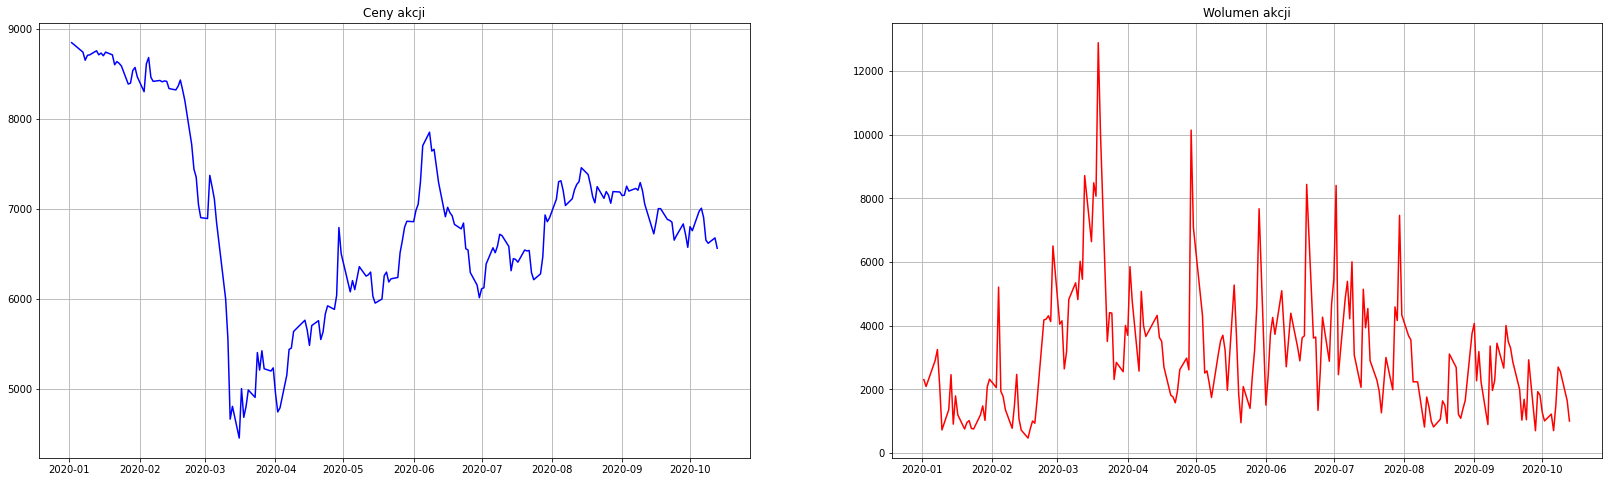

In [ ]:
make_graphics(df)

>> ### 4. Stopa zwrotu akcji

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


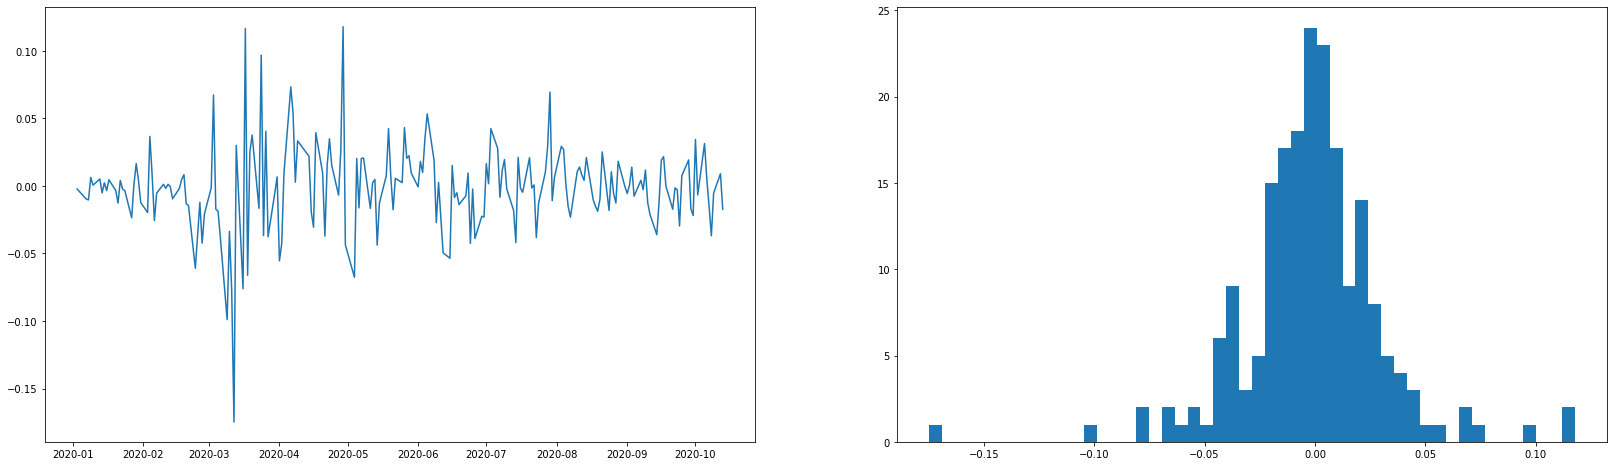

In [ ]:
relative_change(df)

> ## Analiza inwestycji

--------------------wig20.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

               Open     High      Low    Close    Volume
Date                                                    
2020-10-07  1736.62  1741.18  1715.75  1736.61  23829671
2020-10-08  1742.29  1746.68  1711.56  1719.91  22047535
2020-10-09  1718.45  1718.45  1679.01  1698.91  27423797
2020-10-12  1701.76  1707.30  1681.87  1683.21  25089668
2020-10-13  1685.25  1685.25  1659.10  1660.12  26031951
--------------------------------------------------

--------------------lpp.pl---------------------
Tak wygląda pięć najnowszych rekordów Data Frame

            Open  High   Low  Close  Volume
Date                                       
2020-10-07  7040  7095  6810   6900    1510
2020-10-08  6895  6970  6510   6650    2701
2020-10-09  6660  6740  6505   6615    2556
2020-10-12  6650  6750  6600   6675    1646
2020-10-13  6660  6660  6525   6560    1005
-------------------------------------------

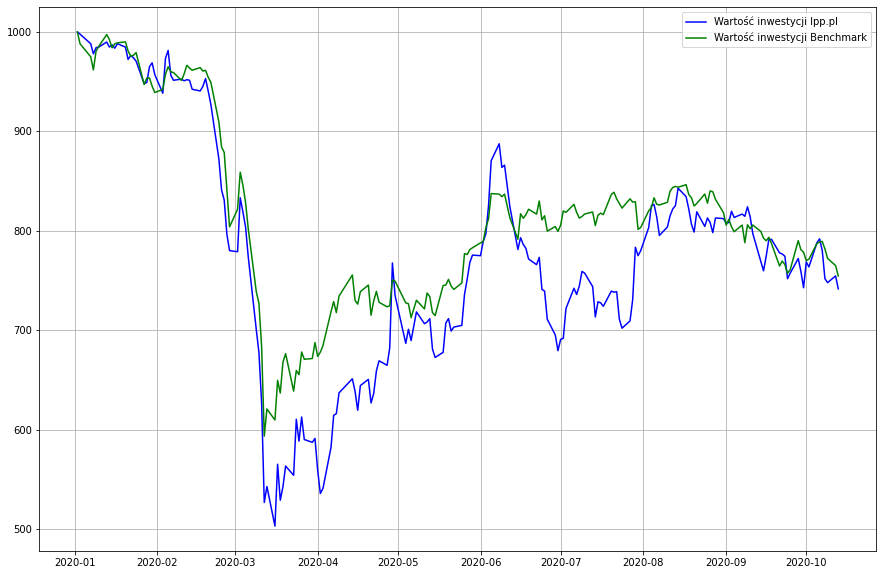

In [ ]:
portfolio_summary(total_investment,stock,start_date,end_date)

# Model

In [ ]:
def make_portfolio(stocks,start_date):
  #Pobieranie danych
  def get_data(stock):
    return pdr.get_data_stooq(stock, start = start_date)
  
  stocks_data = map(get_data,stocks)

  full_dataframe = pd.concat(stocks_data, keys= stocks, names= ['Stock','Date'])

  return  full_dataframe[['Close']].reset_index().pivot(index='Date',columns = 'Stock', values = 'Close')

In [ ]:
make_portfolio(['wig20.pl','pkn.pl'], dt.date(2020,3,1))

Stock,pkn.pl,wig20.pl
Date,,
2020-03-02,59.574,1807.70
2020-03-03,61.246,1889.67
2020-03-04,58.079,1860.95
2020-03-05,55.934,1822.85
2020-03-06,53.455,1764.81
...,...,...
2020-10-07,46.760,1736.61
2020-10-08,46.660,1719.91
2020-10-09,45.830,1698.91
